In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = r'C:\Users\Sudir\Desktop\SDLLearn\4.CNN for Computer Vision with Keras and TF in Python\Others\CNN Python Code\train'
validation_dir = r'C:\Users\Sudir\Desktop\SDLLearn\4.CNN for Computer Vision with Keras and TF in Python\Others\CNN Python Code\validation'
test_dir = r'C:\Users\Sudir\Desktop\SDLLearn\4.CNN for Computer Vision with Keras and TF in Python\Others\CNN Python Code\test'

In [3]:
#DATA PREPROCESSING
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [5]:
model = models.Sequential()

model.add(tf.keras.layers.Conv2D (32, (3,3), activation = 'relu', 
                                 input_shape=(150,150, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D (64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D (128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D (128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
from tensorflow.keras import optimizers

model.compile( optimizer= optimizers.RMSprop(lr=1e-4), 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])


In [8]:
history = model.fit(
    train_generator, 
    steps_per_epoch = 50, 
    epochs=40,
    validation_data = validation_generator, 
    validation_steps= 20)

Epoch 1/40
50/50 [==============================] - 48s 970ms/step - loss: 0.6964 - accuracy: 0.4981 - val_loss: 0.6868 - val_accuracy: 0.5203
Epoch 2/40
50/50 [==============================] - 46s 924ms/step - loss: 0.6912 - accuracy: 0.5294 - val_loss: 0.6851 - val_accuracy: 0.5375
Epoch 3/40
50/50 [==============================] - 50s 1s/step - loss: 0.6824 - accuracy: 0.5600 - val_loss: 0.6671 - val_accuracy: 0.5766
Epoch 4/40
50/50 [==============================] - 116s 2s/step - loss: 0.6658 - accuracy: 0.5950 - val_loss: 0.6574 - val_accuracy: 0.5984
Epoch 5/40
50/50 [==============================] - 115s 2s/step - loss: 0.6615 - accuracy: 0.6023 - val_loss: 0.6878 - val_accuracy: 0.5391
Epoch 6/40
50/50 [==============================] - 54s 1s/step - loss: 0.6567 - accuracy: 0.6137 - val_loss: 0.6259 - val_accuracy: 0.6344
Epoch 7/40
50/50 [==============================] - 53s 1s/step - loss: 0.6426 - accuracy: 0.6225 - val_loss: 0.6752 - val_accuracy: 0.5641
Epoch 8/40
5

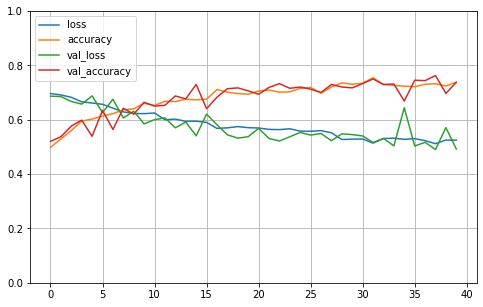

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
K.clear_session()
del model